# Hierarchical clustering on gene expression dataset

## a. Preparing the data

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns; sns.set_style('whitegrid')

In [44]:
genes = pd.read_csv('../../datasets/Ch10Ex11.csv', header=None)
genes.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,-0.961933,0.441803,-0.975005,1.417504,0.818815,0.316294,-0.024967,-0.063966,0.031497,-0.350311,...,-0.509591,-0.216726,-0.055506,-0.484449,-0.521581,1.949135,1.324335,0.468147,1.061100,1.655970
1,-0.292526,-1.139267,0.195837,-1.281121,-0.251439,2.511997,-0.922206,0.059543,-1.409645,-0.656712,...,1.700708,0.007290,0.099062,0.563853,-0.257275,-0.581781,-0.169887,-0.542304,0.312939,-1.284377
2,0.258788,-0.972845,0.588486,-0.800258,-1.820398,-2.058924,-0.064764,1.592124,-0.173117,-0.121087,...,-0.615472,0.009999,0.945810,-0.318521,-0.117889,0.621366,-0.070764,0.401682,-0.016227,-0.526553
3,-1.152132,-2.213168,-0.861525,0.630925,0.951772,-1.165724,-0.391559,1.063619,-0.350009,-1.489058,...,-0.284277,0.198946,-0.091833,0.349628,-0.298910,1.513696,0.671185,0.010855,-1.043689,1.625275
4,0.195783,0.593306,0.282992,0.247147,1.978668,-0.871018,-0.989715,-1.032253,-1.109654,-0.385142,...,-0.692998,-0.845707,-0.177497,-0.166491,1.483155,-1.687946,-0.141430,0.200778,-0.675942,2.220611


In [45]:
genes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
0     1000 non-null float64
1     1000 non-null float64
2     1000 non-null float64
3     1000 non-null float64
4     1000 non-null float64
5     1000 non-null float64
6     1000 non-null float64
7     1000 non-null float64
8     1000 non-null float64
9     1000 non-null float64
10    1000 non-null float64
11    1000 non-null float64
12    1000 non-null float64
13    1000 non-null float64
14    1000 non-null float64
15    1000 non-null float64
16    1000 non-null float64
17    1000 non-null float64
18    1000 non-null float64
19    1000 non-null float64
20    1000 non-null float64
21    1000 non-null float64
22    1000 non-null float64
23    1000 non-null float64
24    1000 non-null float64
25    1000 non-null float64
26    1000 non-null float64
27    1000 non-null float64
28    1000 non-null float64
29    1000 non-null float64
30    1000 non-null float64
31    1000 non-null float6

## b. Hierarchical clustering

Since we are interested in seeing whether the genes separate the tissue samples into health and diseased classes, the observations are the tissue samples, while the genes are the variables (i.e. we have 40 points in $\mathbb{R}^{1000}$ not 1000 points in $\mathbb{R}^{40}$). Thus we want to work with the transpose of the `gene` matrix.

Note we do not scale the gene variables by their standard deviation, since they are all measured in the same units

In [99]:
tissues = genes.transpose()
tissues.shape

(40, 1000)

Standard python library clustering methods (e.g. `sklearn` and `scipy`) don't have correlation-based distance built-in. We might recall (see [exercise 7](CH10_Exercise_07.ipynb)) that for data with zero mean and standard deviation 1, $d_{Eucl}(x_i, x_j) \propto d_{corr}(x_i, x_j)$. But in this case we are not standardizing the data (see above) so we don't want to use the Euclidean distance.

A better alternative is to precompute the [correlation based distance](https://www.datanovia.com/en/lessons/clustering-distance-measures/)
$d_{corr}(x_i, x_j) = 1 - \text{corr}(x_i, x_j)$ since `scipy`'s linkage will accept a dissimilarity (distance) matrix as input.

### Clustering with precomputed correlation distance

In [102]:
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import squareform

# pandas.DataFrame.corr() gives correlation of columns but we want correlation of rows (genes)
corr_dist_matrix = squareform(1 - tissues.transpose().corr())

In [101]:
corr_dist_matrix.shape

(780,)

#### Single linkage

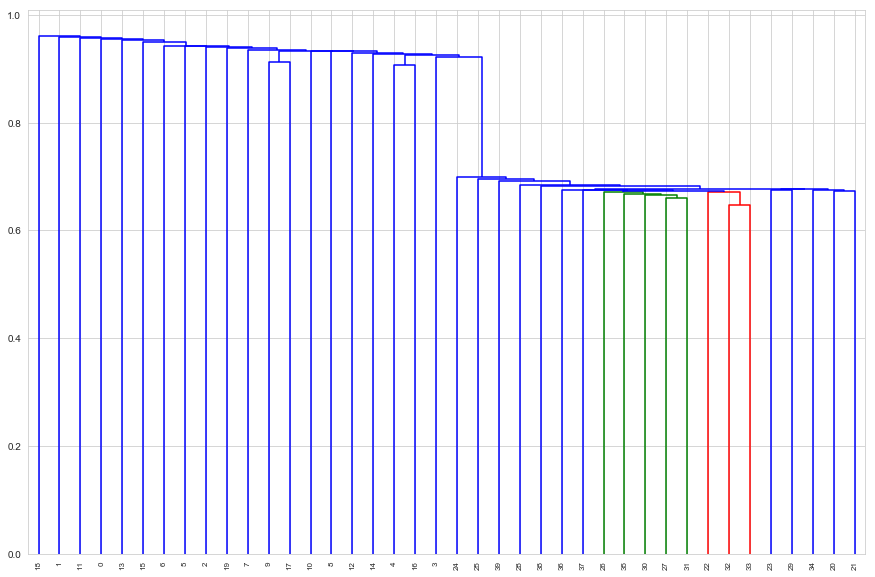

In [103]:
plt.figure(figsize=(15, 10))
single_linkage = linkage(corr_dist_matrix, method='single')
d_single = dendrogram(single_linkage, labels=tissues.index, leaf_rotation=90)

Here single linkage has managed to clearly separate the classes perfectly

In [104]:
# cluster 1
sorted(d_single['ivl'][ : d_single['ivl'].index(3) + 1])

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [70]:
%pprint

Pretty printing has been turned OFF


In [105]:
# cluster 2
sorted(d_single['ivl'][d_single['ivl'].index(3) + 1 : ])

[20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]

#### Complete linkage

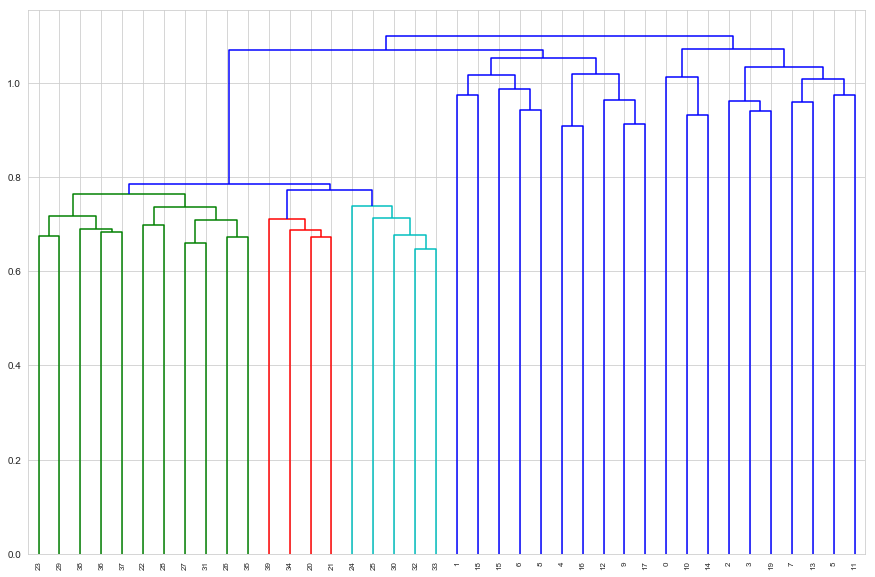

In [106]:
plt.figure(figsize=(15, 10))
complete_linkage = linkage(corr_dist_matrix, method='complete')
d_complete = dendrogram(complete_linkage, labels=tissues.index, leaf_rotation=90)

Here complete linkage has not managed to clearly separate the classes perfectly. If we cut the dendrogram to get two classes we get clusters

In [107]:
# cluster 1
sorted(d_complete['ivl'][ : d_complete['ivl'].index(17) + 1])

[1, 4, 6, 8, 9, 12, 15, 16, 17, 18, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]

In [70]:
%pprint

Pretty printing has been turned OFF


In [108]:
# cluster 2
sorted(d_complete['ivl'][d_complete['ivl'].index(17) + 1 : ])

[0, 2, 3, 5, 7, 10, 11, 13, 14, 19]

Note however, that if we cut to get three clusters, and merge the two that were not merged, we do get perfect class separation

In [109]:
# cluster 1
sorted(d_complete['ivl'][ : d_complete['ivl'].index(33) + 1])

[20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]

In [110]:
# cluster 1
sorted(d_complete['ivl'][d_complete['ivl'].index(33) + 1 : ])

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

#### Average linkage

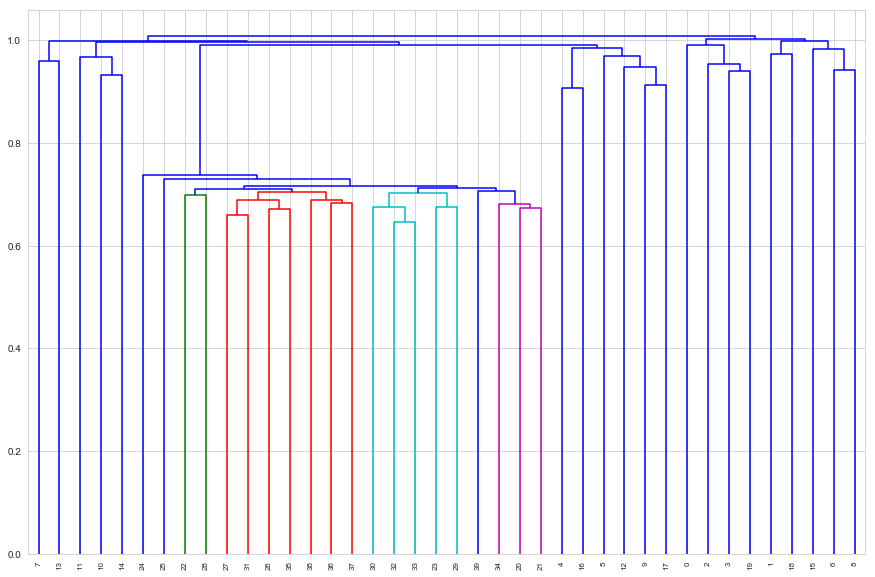

In [111]:
plt.figure(figsize=(15, 10))
avg_linkage = linkage(corr_dist_matrix, method='average')
d_avg = dendrogram(avg_linkage, labels=tissues.index, leaf_rotation=90)

Average linkage does a poorer job of separating the classes

#### Centroid linkage

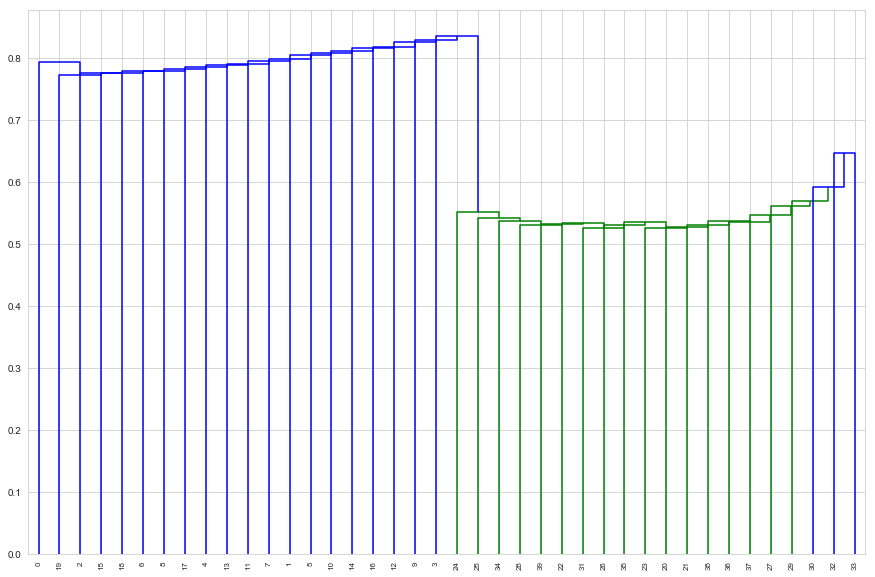

In [115]:
plt.figure(figsize=(15, 10))
cent_linkage = linkage(corr_dist_matrix, method='centroid')
d_cent = dendrogram(cent_linkage, labels=tissues.index, leaf_rotation=90)

Centroid linkage separates the classes perfectly

In [119]:
# cluster 1
sorted(d_cent['ivl'][ : d_cent['ivl'].index(3) + 1])

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [120]:
# cluster 2
sorted(d_cent['ivl'][d_cent['ivl'].index(3) + 1 : ])

[20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]

## c. Which genes differ the most across the two groups?

We could answer this question using classical statistical inference. For example, we could do confidence intervals or  hypothesis tests for the difference of means of the expression each gene across the healthy and diseased tissue samples. However, it seems likely the authors intended us to use the techniques of this chapter.

Recall that the first principal component is the direction along which the data has the greatest variance. The loadings $\phi_{1, j}$ are the weights of the variables $X_j$ along this direction, so the magnitude of $\phi_{1, j}$ can be taken as a measure of the degree to which the variable $X_j$ varies across the dataset.

To answer the question of which genes $X_j$ differ across the two groups we can:
- Find $\phi_{1, j}$ the first PCA component loading for the full dataset, and take this as the degree to which the gene $X_j$ varies across all tissue samples.
- Find $\phi^{h}_{1, j}, \phi^{d}_{1, j}$ the first PCA component loadings for the healthy and diseased datasets, respectively, and take each as the degree to which the gene $X_j$ varies within the health and diseased groups, respectively.
- Reason that a high magnitude for $\phi_{1, j}$ will indicate large variance across all tissue samples, while low magnitudes for $\phi^{h}_{1, j}$, $\phi^{d}_{1, j}$ will indicate low variances within the respective tissue sample groups, and conclude that such a $X_j$ differs in its expression across the two groups.
-  Calculate some quantity which allows us to rank $X_j$ in this fashion. We choose
$$ |\phi_{1, j}| - \max\{|\phi^{h}_{1, j}|, |\phi^{c}_{1, j}|\}$$


In [127]:
from sklearn.decomposition import PCA

pca_full, pca_h, pca_c = PCA(), PCA(), PCA()

pca_full.fit(tissues)
pca_h.fit(tissues.loc[:19, :])
pca_d.fit(tissues.loc[20:, :])

phi_full = pca_full.components_.transpose()
phi_h = pca_h.components_transpose()
phi_d = pca_d.components_transpose()

diff_rank = np.abs(phi_full, phi_h, phi_c)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)